# DeepLearning Models - Introduction
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org
* W3Schools : www.w3schools.com/python

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org
* SHAP: https://github.com/slundberg/shap
* LIME: https://github.com/marcotcr/lime
* TensorFlow: https://www.tensorflow.org/
* Keras: https://keras.io/

In [93]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
import seaborn as sns

In [45]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [46]:
X_test.shape

(10000, 28, 28)

In [71]:
X_test[0].shape

(28, 28)

In [72]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Number =  7


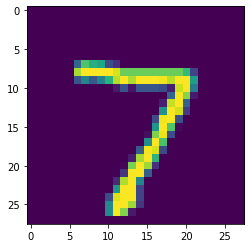

In [48]:
pyplot.imshow(X_test[0])
print("Number = ", y_test[0])

In [30]:
# transform into single channel (monochrome)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [33]:
X_test.shape

(10000, 28, 28, 1)

In [40]:
y_train.shape

(60000,)

In [42]:
# One-hot encode
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [43]:
y_train.shape

(60000, 10)

# Create Model

In [49]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


# Compile Model

In [50]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


# Fit Model

In [52]:
# Fit model
hist = model.fit(X_train, y_train,
                batch_size=32,
                epochs=10,
                verbose=1,
                validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7729 - sparse_categorical_accuracy: 0.8565 - val_loss: 0.5011 - val_sparse_categorical_accuracy: 0.8865
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3948 - sparse_categorical_accuracy: 0.9079 - val_loss: 0.3433 - val_sparse_categorical_accuracy: 0.9135
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2981 - sparse_categorical_accuracy: 0.9255 - val_loss: 0.2969 - val_sparse_categorical_accuracy: 0.9276
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2658 - sparse_categorical_accuracy: 0.9336 - val_loss: 0.2752 - val_sparse_categorical_accuracy: 0.9373
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2318 - sparse_categorical_accuracy: 0.9421 - val_loss: 0.2842 - val_sparse_categorical_accuracy: 0.9399
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2237 - spars

# Model Fitting History

In [66]:
fit_history = pd.DataFrame(hist.history)
fit_history.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,2.772890,0.856450,0.501073,0.8865
1,0.394758,0.907850,0.343300,0.9135
2,0.298117,0.925533,0.296922,0.9276
3,0.265787,0.933633,0.275164,0.9373
4,0.231750,0.942150,0.284173,0.9399


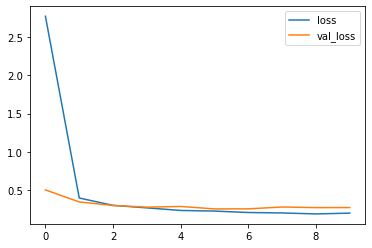

In [68]:
fit_history[['loss', 'val_loss' ]].plot()

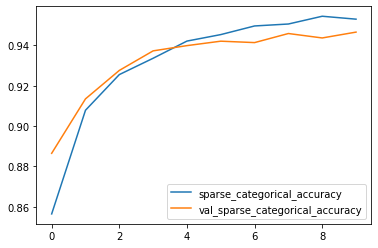

In [69]:
fit_history[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy' ]].plot()

# Evaluate Model

In [76]:
score = model.evaluate(X_test, y_test, verbose=0)    
print(model.summary())
print('train samples:', X_train.shape[0])
print('test samples:', X_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
train samples: 60000
test samples: 10000
Test loss: 0.26957425475120544
Test accuracy: 0.9466000199317932


In [86]:
test_predictions = model.predict(X_test)   
test_predictions

array([[  -3.3240397,   24.79615  ,   43.59265  , ...,   67.667206 ,
          -2.30636  ,   40.321888 ],
       [ -19.97573  ,   30.53826  ,   58.151306 , ...,  -63.722786 ,
         -16.817198 , -163.7481   ],
       [  19.683968 ,   47.20656  ,    5.017287 , ...,   14.014813 ,
          17.289814 ,   13.265624 ],
       ...,
       [   2.7886238,   51.13673  ,   55.820618 , ...,   50.210617 ,
          35.518715 ,   51.719418 ],
       [  20.757456 ,  -69.66258  ,   -6.283155 , ...,   49.64963  ,
          66.67162  ,   31.87524  ],
       [  36.180065 ,    5.4194713,   28.205696 , ...,   21.874928 ,
          24.967352 ,    8.834062 ]], dtype=float32)

In [87]:
test_predictions = np.argmax(test_predictions, axis=1)
test_predictions

array([7, 2, 1, ..., 4, 5, 6])

In [91]:
test_result = pd.DataFrame({'y_act': y_test, 'y_pred':test_predictions})

In [92]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,3,4,5,6,7,8,9,All
y_act,,,,,,,,,,,
0,947,1,0,2,2,2,3,4,19,0,980
1,0,1107,6,1,0,1,2,0,18,0,1135
2,2,2,973,14,8,0,2,3,26,2,1032
3,3,0,8,935,0,13,1,8,37,5,1010
4,0,0,0,0,926,0,9,2,13,32,982
5,1,2,3,19,1,823,6,1,34,2,892
6,7,4,0,1,2,6,923,0,15,0,958
7,0,2,24,8,4,2,0,976,11,1,1028
8,4,0,2,4,8,8,5,6,935,2,974


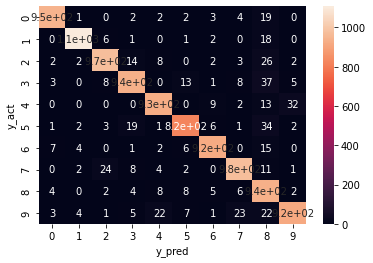

In [94]:

sns.heatmap(pd.crosstab(test_result.y_act, test_result.y_pred, margins=False), annot=True)

<hr>
Last update 2021-10-23 by Sumudu Tennakoon